In [ ]:
# imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# Import the data

In [9]:
# world bank dataset
world_bank = pd.read_csv("../additional_material/world_bank_development_indicators.csv")

# income dataset
income_data = pd.ExcelFile("../additional_material/income.xlsx")

In [10]:
 income_data.sheet_names

['List of economies', 'composition', 'notes']

In [12]:
# only reading first sheet in excel file
economy_income = pd.read_excel(income_data, sheet_name='List of economies')
economy_income

,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,"Middle East, North Africa, Afghanistan & Pakistan",Upper middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,High income,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN
...,...,...,...,...,...
262,Sub-Saharan Africa,SSF,NaN,NaN,NaN
263,Sub-Saharan Africa (excluding high income),SSA,NaN,NaN,NaN
264,Sub-Saharan Africa (IDA & IBRD),TSS,NaN,NaN,NaN
265,Upper middle income,UMC,NaN,NaN,NaN


In [13]:
# Add income/region information by merging the tables into a single dataframe.

world_bank = world_bank.merge(economy_income[['Economy', 'Income group', 'Region']], 
                       how='left', 
                       left_on='country', 
                       right_on='Economy').drop(columns=['Economy'])

In [14]:
world_bank.sample(10)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Income group,Region
206,Albania,1974-01-01,40.948905,NaN,27400.00,1485.0,NaN,NaN,NaN,NaN,...,30.297,7.417,67.769000,2350124.0,1585958.0,NaN,NaN,NaN,Upper middle income,Europe & Central Asia
1824,Botswana,1992-01-01,45.614314,32.761809,566730.00,416.0,13.247751,NaN,NaN,9.398227,...,33.172,8.933,58.348000,1420695.0,760882.0,NaN,NaN,NaN,Upper middle income,Sub-Saharan Africa
16452,United States,2003-01-01,45.080322,33.299920,9161920.00,715.0,4.801465,1.704491,0.162804,100.000000,...,14.100,8.400,77.036585,290107933.0,59231337.0,1.338228,0.186603,NaN,High income,North America
9944,Malta,1988-01-01,40.625000,NaN,320.00,560.0,52.757100,NaN,NaN,NaN,...,15.900,7.800,74.710073,347325.0,34222.0,NaN,NaN,NaN,High income,"Middle East, North Africa, Afghanistan & Pakistan"
9521,Luxembourg,2013-01-01,50.837846,34.453827,2574.46,934.0,230.937128,2.115775,0.184868,100.000000,...,11.300,7.000,81.800000,543360.0,56651.0,1.631096,0.151881,0.184140,High income,Europe & Central Asia
238,Albania,2006-01-01,40.875912,28.356277,27400.00,1485.0,36.187926,-0.790545,0.152564,99.389366,...,12.539,6.477,76.816000,2992547.0,1561661.0,0.075890,0.135304,3.163096,Upper middle income,Europe & Central Asia
16186,Uganda,1993-01-01,60.467444,17.274981,199810.00,1180.0,12.008611,NaN,NaN,NaN,...,51.152,17.746,46.237000,19462958.0,17101517.0,NaN,NaN,NaN,Low income,Sub-Saharan Africa
10964,Mozambique,2017-01-01,52.431903,47.568097,786380.00,1032.0,26.297149,-0.857985,0.134091,24.300000,...,38.127,8.690,59.771000,28569441.0,18440146.0,-0.419679,0.120179,NaN,Low income,Sub-Saharan Africa
11893,Not classified,1986-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8065,Kiribati,1996-01-01,45.679012,1.456790,810.00,NaN,NaN,NaN,NaN,NaN,...,33.519,7.801,63.291000,82832.0,51864.0,1.150898,0.387606,1.207270,Lower middle income,East Asia & Pacific


In [16]:
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17272 non-null  object 
 1   date                                       17272 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

In [20]:
# dataset column name notaions struture
world_bank.columns = (
    world_bank.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)
world_bank.head()

,country,date,agricultural_land,forest_land,land_area,avg_precipitation,trade_in_services,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity,...,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,income_group,region
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN,Low income,"Middle East, North Africa, Afghanistan & Pakistan"


In [ ]:
# Clean up countries

In [22]:
world_bank['country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica'

In [23]:
# removing empty rows from income_grop
world_bank = world_bank.dropna(subset=['income_group'])
world_bank.shape

(13343, 52)

In [26]:
# unique values in life life_expectancy_at_birth
world_bank['life_expectancy_at_birth'].unique()

array([32.535, 33.068, 33.547, ..., 61.414, 61.124, 59.253],
      shape=(11082,))

In [28]:
# checking null values
world_bank['life_expectancy_at_birth'].isnull().sum()

np.int64(1006)

In [30]:
# droping nan values from life_expectancy_at_birth
world_bank = world_bank.dropna(subset=['life_expectancy_at_birth'])
world_bank.shape

(12337, 52)

In [31]:
# checking duplicates
world_bank.duplicated().sum()

np.int64(0)

In [ ]:
# Some basic initial inspections

In [33]:
# display the first, the last and a random sample of 7 entries
world_bank.head(1), world_bank.tail(1), world_bank.sample(7)

(       country        date  agricultural_land  forest_land  land_area  \
 0  Afghanistan  1960-01-01                NaN          NaN        NaN   
 
    avg_precipitation  trade_in_services  control_of_corruption_estimate  \
 0                NaN                NaN                             NaN   
 
    control_of_corruption_std  access_to_electricity  ...  birth_rate  \
 0                        NaN                    NaN  ...       50.34   
 
    death_rate  life_expectancy_at_birth  population  rural_population  \
 0      31.921                    32.535   8622466.0         7898093.0   
 
    voice_and_accountability_estimate  voice_and_accountability_std  \
 0                                NaN                           NaN   
 
    intentional_homicides  income_group  \
 0                    NaN    Low income   
 
                                               region  
 0  Middle East, North Africa, Afghanistan & Pakistan  
 
 [1 rows x 52 columns],
         country        date

In [37]:
# check data types
world_bank.dtypes

country                                      object
date                                         object
agricultural_land                           float64
forest_land                                 float64
land_area                                   float64
avg_precipitation                           float64
trade_in_services                           float64
control_of_corruption_estimate              float64
control_of_corruption_std                   float64
access_to_electricity                       float64
renewvable_energy_consumption               float64
electric_power_consumption                  float64
co2_emisions                                float64
other_greenhouse_emisions                   float64
population_density                          float64
inflation_annual                            float64
real_interest_rate                          float64
risk_premium_on_lending                     float64
research_and_development_expenditure        float64
central_gove

In [42]:
# check missing values
world_bank.isna().sum()

country                                         0
date                                            0
agricultural_land                            1465
forest_land                                  6166
land_area                                    1321
avg_precipitation                            2750
trade_in_services                            5668
control_of_corruption_estimate               8034
control_of_corruption_std                    8034
access_to_electricity                        6661
renewvable_energy_consumption                6190
electric_power_consumption                   6709
co2_emisions                                 6696
other_greenhouse_emisions                    6696
population_density                           1321
inflation_annual                             4244
real_interest_rate                           8164
risk_premium_on_lending                     10056
research_and_development_expenditure        10158
central_goverment_debt                      10571


In [44]:
# checking duplicates values
world_bank.duplicated().sum()

np.int64(0)

In [47]:
# basic summary statistics for both categorical
#getting statistics on categorical/object columns
obj_cols = world_bank.select_dtypes(include='object').columns
print(f"This dataset has {len(obj_cols)} object columns:", list(obj_cols))

This dataset has 4 object columns: ['country', 'date', 'income_group', 'region']


In [48]:
#detailed statistics on object data
for col in world_bank.select_dtypes(include='object'):
    print(f"\nColumn: {col}")
    print("Count of non-null values:", world_bank[col].count()) 
    print("Number of unique values:", world_bank[col].nunique())
    print("Most frequent value:", world_bank[col].value_counts().idxmax())
    print("Most frequent value (frequency):", world_bank[col].value_counts().max())
    print("Least frequent value:", world_bank[col].value_counts().idxmin())
    print("Least frequent value (frequency):", world_bank[col].value_counts().min())


Column: country
Count of non-null values: 12337
Number of unique values: 203
Most frequent value: Afghanistan
Most frequent value (frequency): 62
Least frequent value: Cayman Islands
Least frequent value (frequency): 1

Column: date
Count of non-null values: 12337
Number of unique values: 62
Most frequent value: 1995-01-01
Most frequent value (frequency): 202
Least frequent value: 1965-01-01
Least frequent value (frequency): 195

Column: income_group
Count of non-null values: 12337
Number of unique values: 4
Most frequent value: High income
Most frequent value (frequency): 4679
Least frequent value: Low income
Least frequent value (frequency): 1488

Column: region
Count of non-null values: 12337
Number of unique values: 7
Most frequent value: Europe & Central Asia
Most frequent value (frequency): 3272
Least frequent value: North America
Least frequent value (frequency): 186


In [49]:
# numerical variables
world_bank.describe()

,agricultural_land,forest_land,land_area,avg_precipitation,trade_in_services,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity,renewvable_energy_consumption,electric_power_consumption,...,multidimensional_poverty_headcount_ratio,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,10872.000000,6171.000000,1.101600e+04,9587.000000,6669.000000,4303.000000,4303.000000,5676.000000,6147.000000,5628.000000,...,433.000000,2032.000000,12315.000000,12320.000000,12337.000000,1.233700e+04,1.221300e+04,4338.000000,4338.000000,3761.000000
mean,36.859765,32.024224,6.333164e+05,1197.780640,23.638020,-0.022664,0.199437,80.971078,30.652775,3253.943467,...,26.855810,37.704429,27.899943,10.359263,64.841867,2.575121e+07,1.405247e+07,-0.024143,0.164513,7.858061
std,22.429526,24.656054,1.700936e+06,801.397558,25.049107,1.002276,0.080858,29.641385,30.384863,4510.362635,...,10.706123,8.897723,13.043383,5.546529,11.264059,1.077548e+08,7.130716e+07,0.991458,0.059423,12.187223
min,0.262821,0.000000,1.000000e+01,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,...,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.103012,0.000000
25%,17.769203,10.882353,1.487000e+04,589.000000,9.821090,-0.799936,0.147376,70.463633,3.725000,442.235588,...,18.500000,31.100000,16.000000,6.800000,57.947000,6.636530e+05,2.973540e+05,-0.828785,0.126784,1.273807
50%,37.647385,30.270000,1.074000e+05,1083.000000,16.197962,-0.257588,0.172068,99.093647,19.780000,1637.804168,...,24.800000,35.500000,26.467000,9.070500,67.661780,4.440300e+06,1.973563e+06,0.008879,0.142200,3.056778
75%,54.710446,50.851685,4.727100e+05,1732.000000,27.779357,0.666760,0.221240,100.000000,53.015000,4399.794384,...,32.600000,43.000000,39.642000,12.243000,73.080000,1.348335e+07,7.284867e+06,0.855610,0.189655,9.010965
max,93.440750,98.574551,1.638995e+07,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,54799.174708,...,74.200000,65.800000,58.121000,103.534000,85.497561,1.412360e+09,9.093848e+08,1.800992,0.578548,138.773986


In [56]:
# basic plots for categorical and numerical variables to check distributions and counts (histogram, barplot)

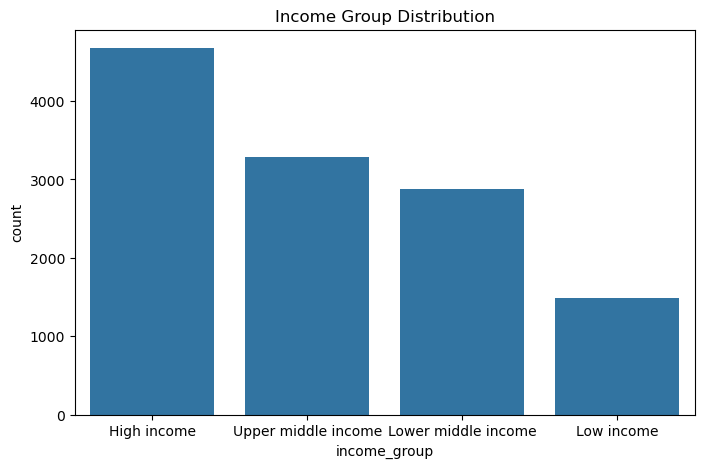

In [55]:
# checking how many times each income_group appears.
plt.figure(figsize=(8,5))
sns.countplot(data=world_bank, x='income_group', order=world_bank['income_group'].value_counts().index)
plt.title("Income Group Distribution")
plt.show()